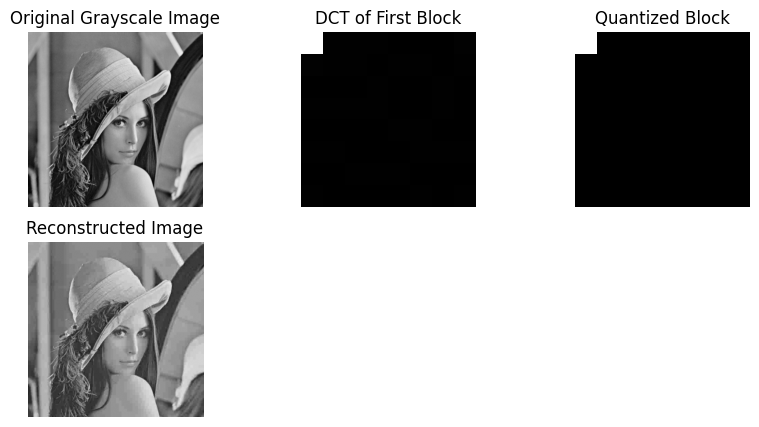

Original Image Size: 462.73 KB
Lossy Compressed (JPEG) Image Size: 14.76 KB
Lossless Compressed (PNG) Image Size: 256.98 KB


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Load the image
image = cv2.imread('Lenna.png', cv2.IMREAD_GRAYSCALE)

# Step 1: Convert Image to Grayscale (already loaded as grayscale)
plt.figure(figsize=(10, 5))
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

# Step 2: Divide Image into 8x8 Blocks
block_size = 8
h, w = image.shape
blocks = [image[i:i+block_size, j:j+block_size] for i in range(0, h, block_size) for j in range(0, w, block_size)]

# Step 3: Apply Discrete Cosine Transform (DCT)
def apply_dct(block):
    return cv2.dct(np.float32(block))
dct_blocks = [apply_dct(block) for block in blocks]

plt.subplot(2, 3, 2)
plt.imshow(dct_blocks[0], cmap='gray')
plt.title('DCT of First Block')
plt.axis('off')

# Step 4: Quantization (Lossy Compression)
def quantize(block, q_factor=50):
    q_matrix = np.ones((8, 8)) * q_factor
    return np.round(block / q_matrix) * q_matrix
quantized_blocks = [quantize(block) for block in dct_blocks]

plt.subplot(2, 3, 3)
plt.imshow(quantized_blocks[0], cmap='gray')
plt.title('Quantized Block')
plt.axis('off')

# Step 5: Encoding (Skipping actual entropy encoding for simplicity)
encoded_blocks = quantized_blocks.copy()

# Step 6: Reconstruction (Decompression)
def apply_idct(block):
    return cv2.idct(np.float32(block))
decompressed_blocks = [apply_idct(block) for block in encoded_blocks]

# Reconstruct Image
reconstructed_image = np.zeros((h, w), dtype=np.uint8)
k = 0
for i in range(0, h, block_size):
    for j in range(0, w, block_size):
        reconstructed_image[i:i+block_size, j:j+block_size] = np.clip(decompressed_blocks[k], 0, 255)
        k += 1

plt.subplot(2, 3, 4)
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

plt.show()

# Save compressed image as JPEG
compressed_filename = 'compressed_image.jpg'
cv2.imwrite(compressed_filename, reconstructed_image, [cv2.IMWRITE_JPEG_QUALITY, 50])

# Lossless Compression using PNG
lossless_filename = 'compressed_image.png'
cv2.imwrite(lossless_filename, image, [cv2.IMWRITE_PNG_COMPRESSION, 0])

# Print file sizes
original_size = os.path.getsize('Lenna.png')
compressed_size = os.path.getsize(compressed_filename)
lossless_size = os.path.getsize(lossless_filename)
print(f'Original Image Size: {original_size / 1024:.2f} KB')
print(f'Lossy Compressed (JPEG) Image Size: {compressed_size / 1024:.2f} KB')
print(f'Lossless Compressed (PNG) Image Size: {lossless_size / 1024:.2f} KB')


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1875/1875 - 13s - 7ms/step - accuracy: 0.9609 - loss: 0.1271 - val_accuracy: 0.9856 - val_loss: 0.0421
Epoch 2/50
1875/1875 - 6s - 3ms/step - accuracy: 0.9866 - loss: 0.0432 - val_accuracy: 0.9869 - val_loss: 0.0391
Epoch 3/50
1875/1875 - 6s - 3ms/step - accuracy: 0.9910 - loss: 0.0291 - val_accuracy: 0.9880 - val_loss: 0.0369
Epoch 4/50
1875/1875 - 6s - 3ms/step - accuracy: 0.9935 - loss: 0.0213 - val_accuracy: 0.9913 - val_loss: 0.0285
Epoch 5/50
1875/1875 - 6s - 3ms/step - accuracy: 0.9950 - loss: 0.0158 - val_accuracy: 0.9869 - val_loss: 0.0455
Epoch 6/50
1875/1875 - 6s - 3ms/step - accuracy: 0.9960 - loss: 0.0123 - val_accuracy: 0.9927 - val_loss: 0.0294
Epoch 7/50
1875/1875 - 6s - 3ms/step - accuracy: 0.9971 - loss: 0.0096 - val_accuracy: 0.9904 - val_loss: 0.0336
Epoch 8/50
1875/1875 - 6s - 3ms/step - accuracy: 0.9970 - loss: 0.0093 - val_accuracy: 0.9919 - val_loss: 0.0307
Epoch 9/50
1875/1875 - 6s - 3ms/step - accuracy: 0.9979 - loss: 0.0063 - val_accuracy: 0.9918 -

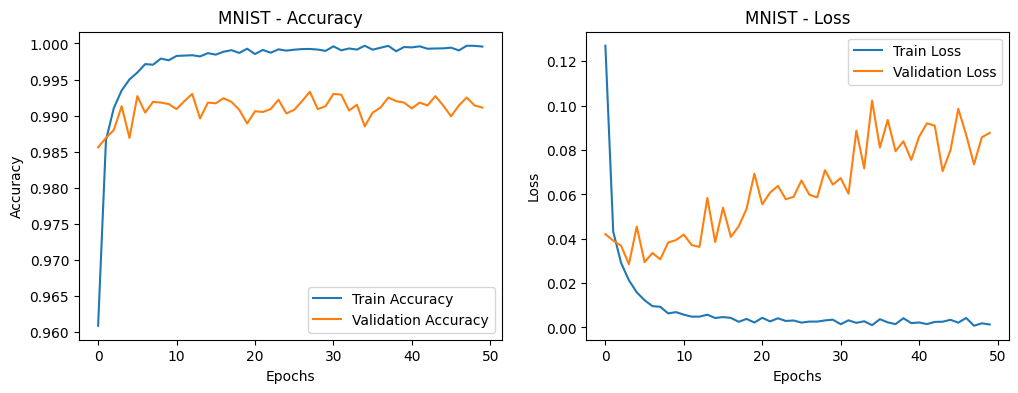

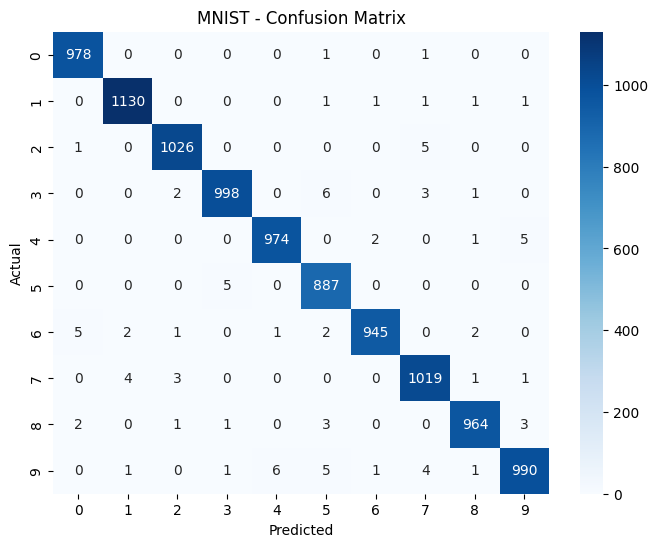

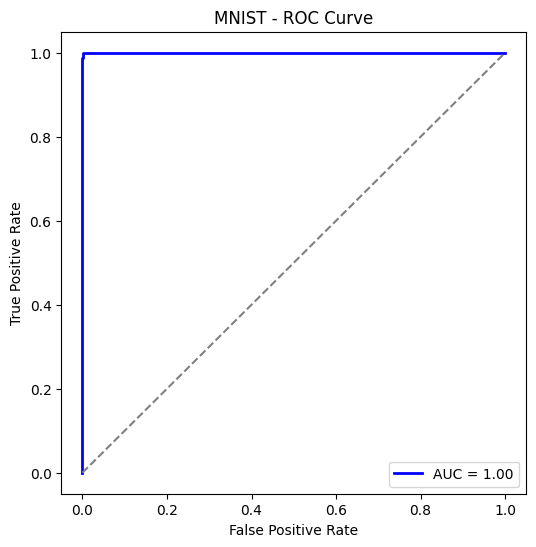

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1563/1563 - 11s - 7ms/step - accuracy: 0.4951 - loss: 1.4083 - val_accuracy: 0.5830 - val_loss: 1.1905
Epoch 2/50
1563/1563 - 6s - 4ms/step - accuracy: 0.6336 - loss: 1.0467 - val_accuracy: 0.6614 - val_loss: 0.9797
Epoch 3/50
1563/1563 - 6s - 4ms/step - accuracy: 0.6862 - loss: 0.9061 - val_accuracy: 0.6833 - val_loss: 0.9148
Epoch 4/50
1563/1563 - 10s - 6ms/step - accuracy: 0.7205 - loss: 0.8047 - val_accuracy: 0.6946 - val_loss: 0.8869
Epoch 5/50
1563/1563 - 5s - 3ms/step - accuracy: 0.7518 - loss: 0.7126 - val_accuracy: 0.6977 - val_loss: 0.8990
Epoch 6/50
1563/1563 - 6s - 4ms/step - accuracy: 0.7779 - loss: 0.6386 - val_accuracy: 0.7022 - val_loss: 0.9125
Epoch 7/50
1563/1563 - 5s - 3ms/step - accuracy: 0.8006 - loss: 0.5656 - val_accuracy: 0.6921 - val_loss: 0.9467
Epoch 8/50
1563/1563 - 6s - 4ms/step - accuracy: 0.8222 - loss: 0.5063 - val_accuracy: 0.7073 - val_loss: 0.9233
Epoch 9/50
1563/1563 - 10s - 6ms/step - accuracy: 0.8458 - loss: 0.4412 - val_accuracy: 0.6893

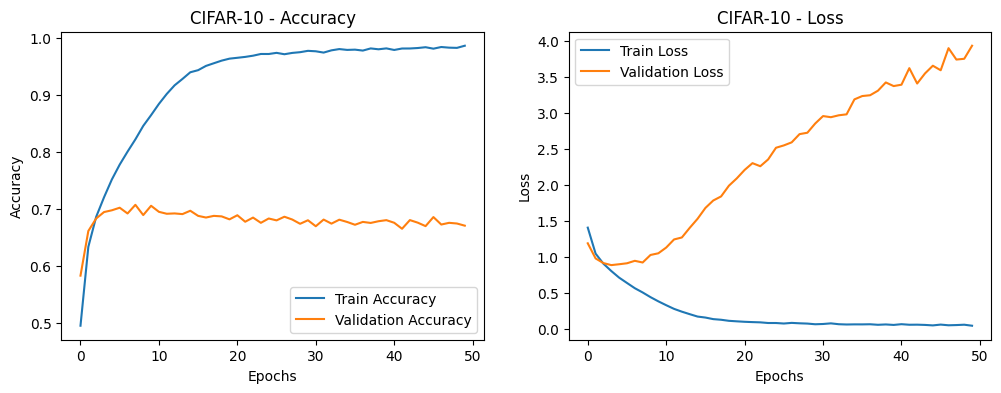

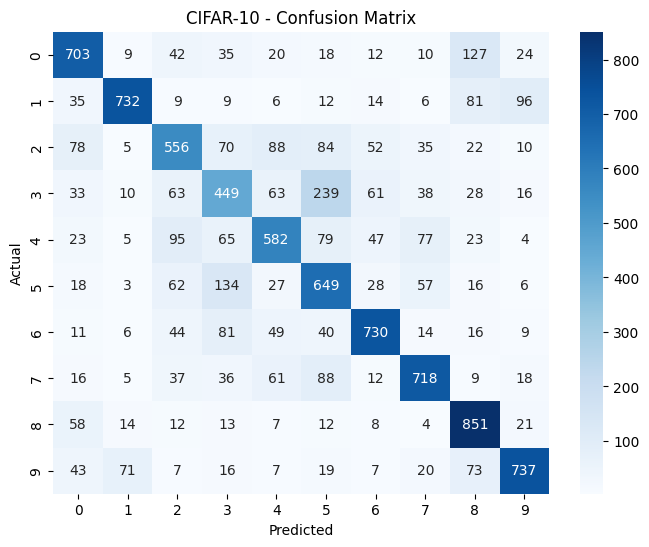

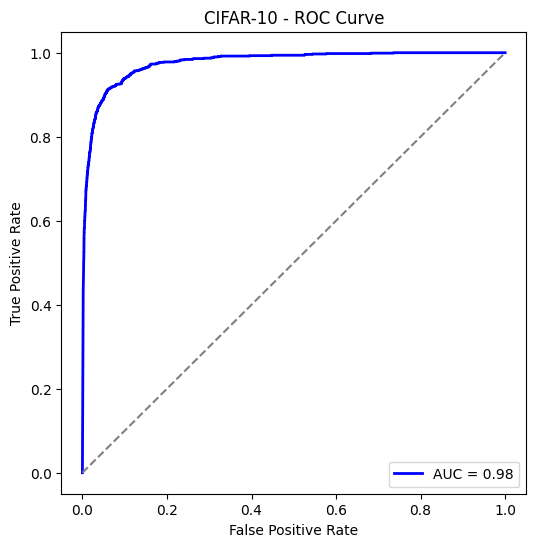

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from keras.datasets import mnist, cifar10

# Function to plot accuracy and loss
def plot_training_history(history, title):
    plt.figure(figsize=(12, 4))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{title} - Confusion Matrix')
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(y_true, y_probs, title):
    fpr, tpr, _ = roc_curve(y_true, y_probs, pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6,6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{title} - ROC Curve')
    plt.legend()
    plt.show()

# Function to train and evaluate a CNN model
def train_evaluate_cnn(dataset_name, dataset, input_shape):
    (x_train, y_train), (x_test, y_test) = dataset.load_data()
    x_train, x_test = x_train / 255.0, x_test / 255.0

    if len(input_shape) == 3:
        x_train = x_train.reshape(-1, *input_shape)
        x_test = x_test.reshape(-1, *input_shape)

    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), verbose=2)

    # Evaluate model
    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
    y_pred_probs = model.predict(x_test)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Print classification report
    print(f"{dataset_name} Classification Report:")
    print(classification_report(y_test, y_pred))

    # Visualizations
    plot_training_history(history, dataset_name)
    plot_confusion_matrix(y_test, y_pred, dataset_name)
    plot_roc_curve(y_test, y_pred_probs[:, 1], dataset_name)

# Train and evaluate on MNIST
train_evaluate_cnn("MNIST", mnist, (28, 28, 1))

# Train and evaluate on CIFAR-10
train_evaluate_cnn("CIFAR-10", cifar10, (32, 32, 3))
